# Feature Scaling Demo

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [10]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Scaling our data

Let's see what effect scaling our data has on some of the features by picking two features
that have a large difference in scale.

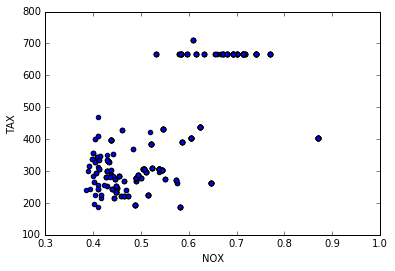

In [11]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

### Standardization

Let's apply standardization, transforming our data to have mean zero $(\mu = 0)$ and variance 1 $(\sigma^2 = 1)$ by the formula:

$$ x' = \frac{x - \mu}{\sigma}$$

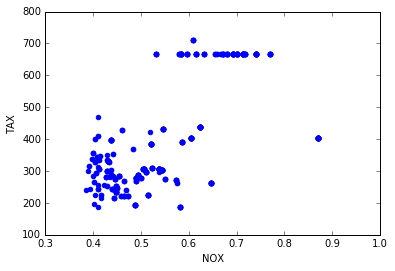

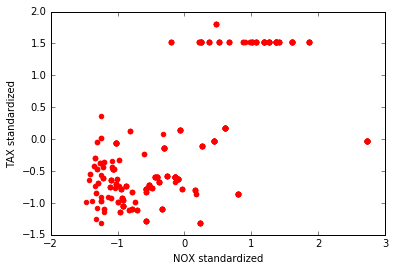

In [12]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df["TAX"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()

As you can see, we did not change the shape of the data, just its scale. You can also use scikit-learn to standardize your data.

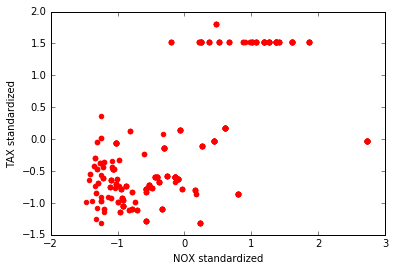

In [13]:
from sklearn import preprocessing

xs = preprocessing.scale(df["NOX"])
ys = preprocessing.scale(df["TAX"])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()


### Min-Max Scaling

To Min-Max scale our data, we use the formula:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

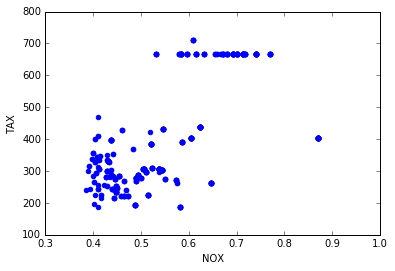

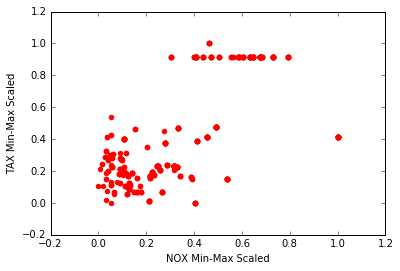

In [14]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["TAX"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

We can use scikit-learn to Min-Max Scale.

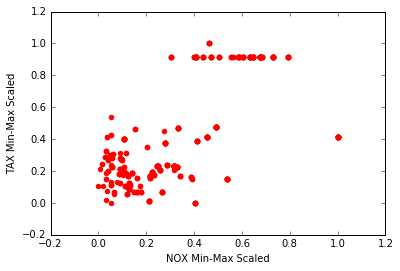

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

### Normalization

We normalize the data by dividing through by some kind of sum or total. For example, it's common to normalize simply by the (*L1*) sum $|X| = \sum_{x \in X}{x}$ or by the (*L2*) euclidean sum of squares distance  $||X|| = \sqrt{\sum_{x \in X}{x^2}}$:

$$x' = \frac{x}{|X|}$$

## Guided Practice

Perform normalization by both the L1 and L2 sums and plot as we did for the other scaling methods.

If you finish early, repeat the exercise [using scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

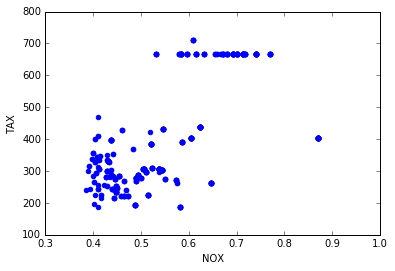

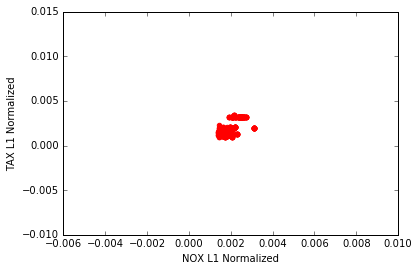

273.0


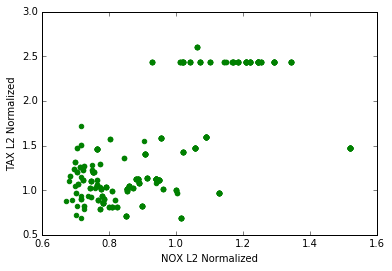

C:\Users\shsiao\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\shsiao\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


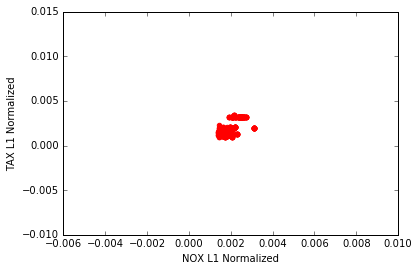

In [16]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
l1_sum = np.sum(xs)
xs = [x / l1_sum for x in xs]

ys = df["TAX"]
l1_sum = np.sum(ys)
ys = [y / l1_sum for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.show()

xs = df["NOX"]
l2_sum = np.sqrt(np.dot(x, x))
xs = [x / l2_sum for x in xs]

ys = df["TAX"]
l2_sum = np.sqrt(np.dot(y, y))
print l2_sum
ys = [y / l2_sum for y in ys]

plt.scatter(xs, ys, color='g')
plt.xlabel("NOX L2 Normalized")
plt.ylabel("TAX L2 Normalized")
plt.show()

# Sklearn

xs = preprocessing.normalize(df["NOX"], norm="l1")
ys = preprocessing.normalize(df["TAX"], norm="l1")

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.show()

### Independent Practice

Let's practice linear fits using feature scaling. For each of the three scaling methods we've discussed:
* Practice scaling and linear fits on the boston housing data using all the data (scaled) versus the target data `boston.target`. Does scaling or normalization affect any of your models? Determine if the model fit score changed. Explain why or why not. (10-20 mins).

Next:
* Try some regularized models. Does scaling have a significant effect on the fit? (10 mins)
* Try some other models from scikit-learn, such as a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).
It's ok if you are unfamiliar with the model, just follow the example code
and explore the fit and the effect of scaling. (10 mins)
* Bonus: try a few extra models like a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). What do you think
about the goodness of fit? Scaling is _required_ for this model.

### Bonus Exercises

Using Scikit-learn, fit some other model to the data, for example a regularization model like a Ridge or Lasso, a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), or a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). Do any of the scaling methods affect the goodness of fit?

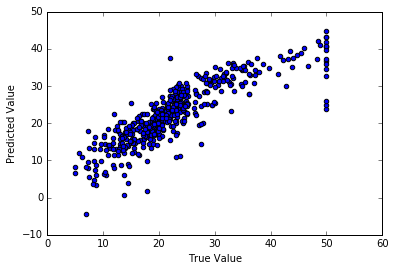

r^2: 0.740607742865


In [17]:
# These are all basically the same, here's one example.
# The linear regression fit score is not affected by scaling since the coefficients adapt.

df = pd.DataFrame(boston.data, columns=boston.feature_names)

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "r^2:", model.score(X, y)

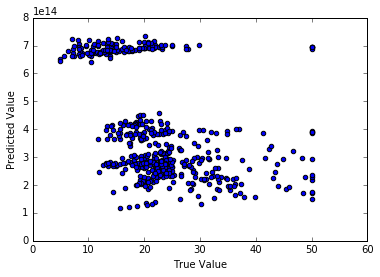

Model score: -2.30921499133e+27


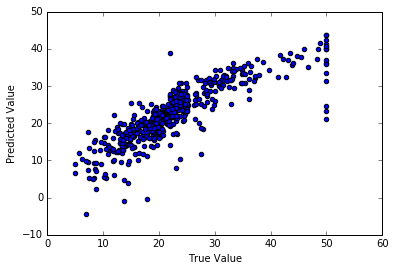

Model score: 0.72900473542


In [18]:
# Stochastic Regressor -- scaling makes a huge difference

X = df
y = boston.target

lm = linear_model.SGDRegressor()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "Model score:", model.score(X, y)

# Scaled

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = linear_model.SGDRegressor()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "Model score:", model.score(X, y)

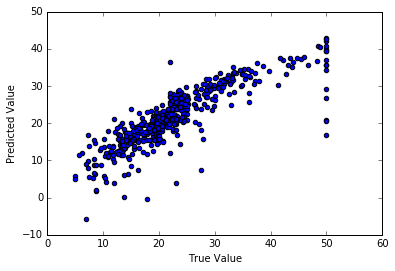

Model score: 0.708924413119


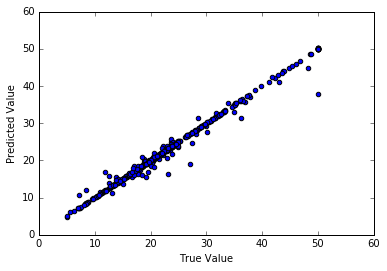

Model score: 0.988401657817


In [20]:
# Support Vector regression
from sklearn.svm import SVR
# # Unscaled WILL CRASH or take a long time

# Scaled

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = SVR(kernel='linear', C=1e3)
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "Model score:", model.score(X, y)

# Scaled, RBF kernel

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
y = boston.target

lm = SVR(kernel='rbf', C=1e3, gamma=0.1)
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

plt.show()
print "Model score:", model.score(X, y)
